<a href="https://colab.research.google.com/github/Veronicacs959/Lab_2/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#!wget -q https://www-us.apache.org/dist/spark/spark-3.0.2/spark-3.0.2-bin-hadoop2.7.tgz
!wget -q https://archive.apache.org/dist/spark/spark-3.0.2/spark-3.0.2-bin-hadoop2.7.tgz
!tar xf spark-3.0.2-bin-hadoop2.7.tgz
!ls
!pip install -q findspark

sample_data  spark-3.0.2-bin-hadoop2.7	spark-3.0.2-bin-hadoop2.7.tgz


In [ ]:
import os
os.environ["SPARK_HOME"] = "/content/spark-3.0.2-bin-hadoop2.7"
import findspark
findspark.init()

In [ ]:
#Creating SparkSession and SQL Context
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

from pyspark.sql import SQLContext
sqlContext = SQLContext(spark)
spark

In [ ]:
#importing CSV
df = spark.read.csv('/content/train.csv',header=False, sep=",", inferSchema=True)

In [ ]:
from pyspark.sql.types import *
df.columns
labels = [
          ("index",IntegerType()),
          ("id",IntegerType()),
          ("Gender",StringType()),
          ("Customer_Type",StringType()),
          ("Age",IntegerType()),
          ("Type_Travel",StringType()),
          ("Class",StringType()),
          ( "Flight_Distance",IntegerType()),
          ("Inflight_wifi_service",IntegerType()),
          ("Departure/Arrival_time_convenient",IntegerType()),
          ("Ease_of_Online_booking",IntegerType()),
          ("Gate_location",IntegerType()),
          ("Food_and_drink",IntegerType()),
          ("Online_boarding",IntegerType()),
          ("Seat_comfort",IntegerType()),
          ("Inflight_entertainment",IntegerType()),
          ("On-board_service",IntegerType()),
          ("Leg_room_service",IntegerType()),
          ("Baggage_handling",IntegerType()),
          ("Checkin_service",IntegerType()),
          ("Inflight_service",IntegerType()),
          ("Cleanliness",IntegerType()),
          ("Departure_Delay_in_Minutes",IntegerType()),
          ("Arrival_Delay_in_Minutes",DoubleType()),
          ("satisfaction",StringType())
          
           ]


# Create the schema 
schema = StructType([StructField (x[0], x[1], True) for x in labels])
df = spark.read.csv('/content/train.csv', header=True, sep=",", schema=schema)
df.printSchema()
# Check schema 


root
 |-- index: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Customer_Type: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Type_Travel: string (nullable = true)
 |-- Class: string (nullable = true)
 |-- Flight_Distance: integer (nullable = true)
 |-- Inflight_wifi_service: integer (nullable = true)
 |-- Departure/Arrival_time_convenient: integer (nullable = true)
 |-- Ease_of_Online_booking: integer (nullable = true)
 |-- Gate_location: integer (nullable = true)
 |-- Food_and_drink: integer (nullable = true)
 |-- Online_boarding: integer (nullable = true)
 |-- Seat_comfort: integer (nullable = true)
 |-- Inflight_entertainment: integer (nullable = true)
 |-- On-board_service: integer (nullable = true)
 |-- Leg_room_service: integer (nullable = true)
 |-- Baggage_handling: integer (nullable = true)
 |-- Checkin_service: integer (nullable = true)
 |-- Inflight_service: integer (nullable = true)
 |-- Cleanlines

In [ ]:
print(df.columns)
print(df.describe().show())

['index', 'id', 'Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Class', 'Flight_Distance', 'Inflight_wifi_service', 'Departure/Arrival_time_convenient', 'Ease_of_Online_booking', 'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'On-board_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service', 'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes', 'satisfaction']
+-------+-----------------+-----------------+------+-----------------+------------------+---------------+--------+------------------+---------------------+---------------------------------+----------------------+------------------+------------------+------------------+------------------+----------------------+-----------------+------------------+------------------+------------------+------------------+------------------+--------------------------+------------------------+--------------------+
|summary|            index|          

In [ ]:
# Number of rows & Columns in total 
print("Number of rows: " ,df.count())
print("Number of Columns: ",len(df.columns))

Number of rows:  103904
Number of Columns:  25


In [ ]:
from pyspark.sql.functions import *
#Searching for Null values to cleanup the data 

df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]
   ).show()


+-----+---+------+-------------+---+-----------+-----+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+----------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+------------+
|index| id|Gender|Customer_Type|Age|Type_Travel|Class|Flight_Distance|Inflight_wifi_service|Departure/Arrival_time_convenient|Ease_of_Online_booking|Gate_location|Food_and_drink|Online_boarding|Seat_comfort|Inflight_entertainment|On-board_service|Leg_room_service|Baggage_handling|Checkin_service|Inflight_service|Cleanliness|Departure_Delay_in_Minutes|Arrival_Delay_in_Minutes|satisfaction|
+-----+---+------+-------------+---+-----------+-----+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+---------

In [ ]:
#Dropping Null Values
df=df.na.drop()

In [ ]:
#checking Null values
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]
   ).show()

+-----+---+------+-------------+---+-----------+-----+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+----------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+------------+
|index| id|Gender|Customer_Type|Age|Type_Travel|Class|Flight_Distance|Inflight_wifi_service|Departure/Arrival_time_convenient|Ease_of_Online_booking|Gate_location|Food_and_drink|Online_boarding|Seat_comfort|Inflight_entertainment|On-board_service|Leg_room_service|Baggage_handling|Checkin_service|Inflight_service|Cleanliness|Departure_Delay_in_Minutes|Arrival_Delay_in_Minutes|satisfaction|
+-----+---+------+-------------+---+-----------+-----+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+---------

In [ ]:
# Number of rows & Columns in total 
print("Number of rows: " ,df.count())
print("Number of Columns: ",len(df.columns))

Number of rows:  103594
Number of Columns:  25


In [ ]:
# Columns with categorical values , unique values in order to give inter values for the analysis

print(df.select('Gender').distinct().collect())
print(df.select('Customer_Type').distinct().collect())
print(df.select('Type_Travel').distinct().collect())
print(df.select('Class').distinct().collect())
print(df.select('satisfaction').distinct().collect())

[Row(Gender='Female'), Row(Gender='Male')]
[Row(Customer_Type='Loyal Customer'), Row(Customer_Type='disloyal Customer')]
[Row(Type_Travel='Personal Travel'), Row(Type_Travel='Business travel')]
[Row(Class='Eco Plus'), Row(Class='Business'), Row(Class='Eco')]
[Row(satisfaction='neutral or dissatisfied'), Row(satisfaction='satisfied')]


In [ ]:
#Categorizing the string Columns 
# [Row(Gender='Female' for 0 ), Row(Gender='Male') for 0]
#[Row(Customer Type='Loyal Customer' for 0), Row(Customer Type='disloyal Customer')for 1]
#[Row(Type_Travel='Personal Travel' ==0), Row(Type_Travel='Business travel'==1)]
#[Row(Class='Eco Plus') for 0, Row(Class='Business') for 1 , Row(Class='Eco'). for 2]
#[Row(satisfaction='neutral or dissatisfied') for 0, Row(satisfaction='satisfied') for 1]

In [ ]:
# [Row(Gender='Female' for 0 ), Row(Gender='Male') for 0]

from pyspark.sql.functions import when
df = df.withColumn("Gender", when(df.Gender == "Female",0) \
      .when(df.Gender == "Male",1) \
      .otherwise(df.Gender))
df.show(5)
print(df.select('Gender').distinct().collect())

+-----+------+------+-----------------+---+---------------+--------+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+----------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+--------------------+
|index|    id|Gender|    Customer_Type|Age|    Type_Travel|   Class|Flight_Distance|Inflight_wifi_service|Departure/Arrival_time_convenient|Ease_of_Online_booking|Gate_location|Food_and_drink|Online_boarding|Seat_comfort|Inflight_entertainment|On-board_service|Leg_room_service|Baggage_handling|Checkin_service|Inflight_service|Cleanliness|Departure_Delay_in_Minutes|Arrival_Delay_in_Minutes|        satisfaction|
+-----+------+------+-----------------+---+---------------+--------+---------------+---------------------+---------------------------------+----------------------+---------

In [ ]:
#[Row(Customer Type='Loyal Customer' for 0), Row(Customer Type='disloyal Customer')for 1]
#[Row(Class='Eco Plus') for 0, Row(Class='Business') for 1 , Row(Class='Eco'). for 2]
#[Row(satisfaction='neutral or dissatisfied') for 0, Row(satisfaction='satisfied') for 1]


#Categorizing the string Columns 
# [Row(Gender='Female' for 0 ), Row(Gender='Male') for 0]
#[Row(Customer Type='Loyal Customer' for 0), Row(Customer Type='disloyal Customer')for 1]
#[Row(Type_Travel='Personal Travel' ==0), Row(Type_Travel='Business travel'==1)]
#[Row(Class='Eco Plus') for 0, Row(Class='Business') for 1 , Row(Class='Eco'). for 2]
#[Row(satisfaction='neutral or dissatisfied') for 0, Row(satisfaction='satisfied') for 1]


df = df.withColumn("Customer_Type", when(df.Customer_Type == "Loyal Customer",0) \
      .when(df.Customer_Type == "disloyal Customer",1) \
      .otherwise(df.Customer_Type))
df = df.withColumn("Type_Travel", when(df.Type_Travel == "Personal Travel",0) \
      .when(df.Type_Travel == "Business travel",1) \
      .otherwise(df.Type_Travel))
df = df.withColumn("Class", when(df.Class == "Eco Plus",0) \
      .when(df.Class == "Business",1) \
      .when(df.Class == "Eco",2) \
      .otherwise(df.Class))
# df = df.withColumn("satisfaction", when(df.satisfaction == "neutral or dissatisfied",0) \
#       .when(df.satisfaction == "satisfied",1) \
#       .otherwise(df.satisfaction))


In [ ]:
#Checking 
df.show(5)
print(df.select('Gender').distinct().collect())
print(df.select('Customer_Type').distinct().collect())
print(df.select('Type_Travel').distinct().collect())
print(df.select('Class').distinct().collect())
print(df.select('satisfaction').distinct().collect())

+-----+------+------+-------------+---+-----------+-----+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+----------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+--------------------+
|index|    id|Gender|Customer_Type|Age|Type_Travel|Class|Flight_Distance|Inflight_wifi_service|Departure/Arrival_time_convenient|Ease_of_Online_booking|Gate_location|Food_and_drink|Online_boarding|Seat_comfort|Inflight_entertainment|On-board_service|Leg_room_service|Baggage_handling|Checkin_service|Inflight_service|Cleanliness|Departure_Delay_in_Minutes|Arrival_Delay_in_Minutes|        satisfaction|
+-----+------+------+-------------+---+-----------+-----+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+-------------

In [ ]:
#changing Schema type with the new values 

df = df \
  .withColumn("Gender" ,
              df["Gender"]
              .cast(IntegerType()))   \
  .withColumn("Customer_Type",
              df["Customer_Type"]
              .cast(IntegerType()))    \
  .withColumn("Type_Travel"  ,
              df["Type_Travel"]
              .cast(IntegerType())) \
  .withColumn("Class"  ,
              df["Class"]
              .cast(IntegerType())) \
  
df.printSchema()

root
 |-- index: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- Gender: integer (nullable = true)
 |-- Customer_Type: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Type_Travel: integer (nullable = true)
 |-- Class: integer (nullable = true)
 |-- Flight_Distance: integer (nullable = true)
 |-- Inflight_wifi_service: integer (nullable = true)
 |-- Departure/Arrival_time_convenient: integer (nullable = true)
 |-- Ease_of_Online_booking: integer (nullable = true)
 |-- Gate_location: integer (nullable = true)
 |-- Food_and_drink: integer (nullable = true)
 |-- Online_boarding: integer (nullable = true)
 |-- Seat_comfort: integer (nullable = true)
 |-- Inflight_entertainment: integer (nullable = true)
 |-- On-board_service: integer (nullable = true)
 |-- Leg_room_service: integer (nullable = true)
 |-- Baggage_handling: integer (nullable = true)
 |-- Checkin_service: integer (nullable = true)
 |-- Inflight_service: integer (nullable = true)
 |-- Cleanl

In [ ]:
df_s_numerical = df.withColumn("satisfaction", when(df.satisfaction == "neutral or dissatisfied",0) \
      .when(df.satisfaction == "satisfied",1) \
      .otherwise(df.satisfaction))
df_s_numerical = df \
  .withColumn("satisfaction" ,
              df["satisfaction"]
              .cast(IntegerType()))   \

In [ ]:
df.show(5)

+-----+------+------+-------------+---+-----------+-----+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+----------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+--------------------+
|index|    id|Gender|Customer_Type|Age|Type_Travel|Class|Flight_Distance|Inflight_wifi_service|Departure/Arrival_time_convenient|Ease_of_Online_booking|Gate_location|Food_and_drink|Online_boarding|Seat_comfort|Inflight_entertainment|On-board_service|Leg_room_service|Baggage_handling|Checkin_service|Inflight_service|Cleanliness|Departure_Delay_in_Minutes|Arrival_Delay_in_Minutes|        satisfaction|
+-----+------+------+-------------+---+-----------+-----+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+-------------

In [ ]:
# Balance data set 

import pyspark.sql.functions as F

tot = df.count()

df.groupBy("satisfaction") \
  .count() \
  .withColumnRenamed('count', 'cnt_per_group') \
  .withColumn('perc_of_count_total', (F.col('cnt_per_group') / tot) * 100 ) \
  .show()

  #Level of satisfacion 56%, low level of satisffacion

+--------------------+-------------+-------------------+
|        satisfaction|cnt_per_group|perc_of_count_total|
+--------------------+-------------+-------------------+
|neutral or dissat...|        58697| 56.660617410274725|
|           satisfied|        44897| 43.339382589725275|
+--------------------+-------------+-------------------+



In [ ]:
# Level of satifaccion in loyal customers vs level or satisfaccion in not loyal customers 
#[Row(Customer Type='Loyal Customer' for 0), Row(Customer Type='disloyal Customer')for 1]
df_analysis=df.select("Customer_Type")
df_analysis.show(3)


tot = df_analysis.count()

df_analysis.groupBy("Customer_Type") \
  .count() \
  .withColumnRenamed('count', 'cnt_per_group') \
  .withColumn('perc_of_count_total', (F.col('cnt_per_group') / tot) * 100 ) \
  .show()

  #81 % of the cutomer are Loyal customers 

+-------------+
|Customer_Type|
+-------------+
|            0|
|            1|
|            0|
+-------------+
only showing top 3 rows

+-------------+-------------+-------------------+
|Customer_Type|cnt_per_group|perc_of_count_total|
+-------------+-------------+-------------------+
|            1|        18932|  18.27518968280016|
|            0|        84662|  81.72481031719984|
+-------------+-------------+-------------------+



In [ ]:
df.groupBy("Gender").agg(avg((col("satisfaction") == "satisfied").cast("integer"))).show()


+------+--------------------------------------------+
|Gender|avg(CAST((satisfaction = satisfied) AS INT))|
+------+--------------------------------------------+
|     1|                          0.4396095495707397|
|     0|                          0.4273622945830797|
+------+--------------------------------------------+



AnalysisException: ignored

In [ ]:
#Checking % of satisfaccion in Loyal customers 
df_Loyal =  df.filter("Customer_Type == 0").select("Customer_Type","satisfaction")
df_Loyal.show(3)

tot = df_Loyal.count()

df_Loyal.groupBy("satisfaction") \
  .count() \
  .withColumnRenamed('count', 'cnt_per_group') \
  .withColumn('perc_of_count_total', (F.col('cnt_per_group') / tot) * 100 ) \
  .show()

  #In the Loyal customer the level of satisfaccion is the 47%, below 50%

+-------------+--------------------+
|Customer_Type|        satisfaction|
+-------------+--------------------+
|            0|neutral or dissat...|
|            0|           satisfied|
|            0|neutral or dissat...|
+-------------+--------------------+
only showing top 3 rows

+--------------------+-------------+-------------------+
|        satisfaction|cnt_per_group|perc_of_count_total|
+--------------------+-------------+-------------------+
|neutral or dissat...|        44249|  52.26547919964093|
|           satisfied|        40413|  47.73452080035908|
+--------------------+-------------+-------------------+



In [ ]:
#Checking % of satisfaccion in no Loyal customers 
df_disloyal= df.filter("Customer_Type == 1").select("Customer_Type","satisfaction")
df_disloyal.show(3)

tot = df_disloyal.count()

df_disloyal.groupBy("satisfaction") \
  .count() \
  .withColumnRenamed('count', 'cnt_per_group') \
  .withColumn('perc_of_count_total', (F.col('cnt_per_group') / tot) * 100 ) \
  .show()

  #In the case of disloyal customers the level of satisfaccion is 23 % quite below Loyal Customers with almost the 50%

+-------------+--------------------+
|Customer_Type|        satisfaction|
+-------------+--------------------+
|            1|neutral or dissat...|
|            1|neutral or dissat...|
|            1|neutral or dissat...|
+-------------+--------------------+
only showing top 3 rows

+--------------------+-------------+-------------------+
|        satisfaction|cnt_per_group|perc_of_count_total|
+--------------------+-------------+-------------------+
|neutral or dissat...|        14448|  76.31523346714557|
|           satisfied|         4484| 23.684766532854425|
+--------------------+-------------+-------------------+



In [ ]:

# id the case of satisfied and unsatisfied customers 
from pyspark.sql.functions import col, countDistinct

df_dis = df.agg(*(countDistinct(col(c)).alias(c) for c in df.columns))
df_dis.show()
#As we can see there is not duplicate ids. every survey it is comming from a different customer 


+------+------+------+-------------+---+-----------+-----+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+----------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+------------+
| index|    id|Gender|Customer_Type|Age|Type_Travel|Class|Flight_Distance|Inflight_wifi_service|Departure/Arrival_time_convenient|Ease_of_Online_booking|Gate_location|Food_and_drink|Online_boarding|Seat_comfort|Inflight_entertainment|On-board_service|Leg_room_service|Baggage_handling|Checkin_service|Inflight_service|Cleanliness|Departure_Delay_in_Minutes|Arrival_Delay_in_Minutes|satisfaction|
+------+------+------+-------------+---+-----------+-----+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+----------

In [ ]:
# Most features are based on a survey from 0 to 5 level of satisfaccion. 
# Let's observe the average level of satisfaccion in differents features
#Target. Majority of the surveis 

df_L =df.filter("Customer_Type == 0").select('Gender','Age','Type_Travel','Class',"satisfaction")
df_L.describe().show()
# Conclusions same F and M, average age 41 with stddev 15 range of survey 25 to 55, 
# Class 50% Bussines 50% Ecco( Eco puls minimun), higher satisfaccion Bussines than ECO.  


+-------+------------------+------------------+------------------+------------------+--------------------+
|summary|            Gender|               Age|       Type_Travel|             Class|        satisfaction|
+-------+------------------+------------------+------------------+------------------+--------------------+
|  count|             84662|             84662|             84662|             84662|               84662|
|   mean|0.4999409416267038| 41.39455718031702|0.6224280078429519|1.3420779098060522|                null|
| stddev|0.5000029494569134|15.144365862879457|0.4847825892154045|0.6201942287122382|                null|
|    min|                 0|                 7|                 0|                 0|neutral or dissat...|
|    max|                 1|                85|                 1|                 2|           satisfied|
+-------+------------------+------------------+------------------+------------------+--------------------+



In [ ]:
#Mayority part of bussines Reason almost 70 % Target.
tot = df.count()

df.groupBy("Type_Travel") \
  .count() \
  .withColumnRenamed('count', 'cnt_per_group') \
  .withColumn('perc_of_count_total', (F.col('cnt_per_group') / tot) * 100 ) \
  .show()

+-----------+-------------+-------------------+
|Type_Travel|cnt_per_group|perc_of_count_total|
+-----------+-------------+-------------------+
|          1|        71465|  68.98565553989613|
|          0|        32129| 31.014344460103864|
+-----------+-------------+-------------------+



In [ ]:
df_L =df.filter("Customer_Type == 0").select( 'Gender',
 'Customer_Type',
 'Age',
 'Type_Travel',
 'Class',
 'Flight_Distance',
 'Inflight_wifi_service',
 'Departure/Arrival_time_convenient',
 'Ease_of_Online_booking',
 'Gate_location',
 'Food_and_drink',
 'Online_boarding',
 'Seat_comfort',
 'Inflight_entertainment',
 'On-board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Inflight_service',
 'Cleanliness',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes',
 'satisfaction')
df_L.describe().show()



# df_L.groupby("Type_Travel").mean().show()

+-------+------------------+-------------+------------------+------------------+------------------+------------------+---------------------+---------------------------------+----------------------+------------------+------------------+------------------+------------------+----------------------+------------------+------------------+-----------------+------------------+------------------+-----------------+--------------------------+------------------------+--------------------+
|summary|            Gender|Customer_Type|               Age|       Type_Travel|             Class|   Flight_Distance|Inflight_wifi_service|Departure/Arrival_time_convenient|Ease_of_Online_booking|     Gate_location|    Food_and_drink|   Online_boarding|      Seat_comfort|Inflight_entertainment|  On-board_service|  Leg_room_service| Baggage_handling|   Checkin_service|  Inflight_service|      Cleanliness|Departure_Delay_in_Minutes|Arrival_Delay_in_Minutes|        satisfaction|
+-------+------------------+--------

In [ ]:
# Observations based on Avg similar age, similar opinion except, time convinient, Food & Online boarding & Seat confort & entretainment, Bussiness(reason for traveling Bussiness) long ditances than Eco(personal travels majority) 
# Bussines higher Satisfaction higher scores 
# Satisfied vs Unsatisfied 


#Categorizing the string Columns 
# [Row(Gender='Female' for 0 ), Row(Gender='Male') for 0]
#[Row(Customer Type='Loyal Customer' for 0), Row(Customer Type='disloyal Customer')for 1]
#[Row(Type_Travel='Personal Travel' ==0), Row(Type_Travel='Business travel'==1)]
#[Row(Class='Eco Plus') for 0, Row(Class='Business') for 1 , Row(Class='Eco'). for 2]
#[Row(satisfaction='neutral or dissatisfied') for 0, Row(satisfaction='satisfied') for 1]

print("Loyal & Satisfied details")
df_s = df.filter( (df['Customer_Type'] == "0")  & (df['satisfaction'] == "satisfied") ) # Loyal & Satisfied 
df_s.describe().show()

print("Loyal & UnSatisfied details ")
df_n =df.filter(( df["Customer_Type"] == 0 ) & (df["satisfaction"]== "neutral or dissatisfied") ) # Loyal & Satisfied 
df_n.describe().show()


#Observation Gender does not affect, Ages does not affect, Mayority of satisfied are in Bussines trips, Bussines Class happier than ECO and ECO Pluss, happier in longer ditances. Satisfied Customers behive similar as Bussiness class due to the fact in Bussines class mayority are happier than ECO

Loyal & Satisfied details
+-------+------------------+------------------+------------------+-------------+------------------+-------------------+------------------+------------------+---------------------+---------------------------------+----------------------+------------------+------------------+------------------+-----------------+----------------------+------------------+------------------+------------------+------------------+-----------------+------------------+--------------------------+------------------------+------------+
|summary|             index|                id|            Gender|Customer_Type|               Age|        Type_Travel|             Class|   Flight_Distance|Inflight_wifi_service|Departure/Arrival_time_convenient|Ease_of_Online_booking|     Gate_location|    Food_and_drink|   Online_boarding|     Seat_comfort|Inflight_entertainment|  On-board_service|  Leg_room_service|  Baggage_handling|   Checkin_service| Inflight_service|       Cleanliness|Departure_Dela

In [ ]:
print("Loyal & Satisfied details by Travel type")
df_s.groupby("Type_Travel").mean().show()


print("Loyal & UnSatisfied details by Travel type")
df_n.groupby("Type_Travel").mean().show()


Loyal & Satisfied details by Travel type
+-----------+-----------------+------------------+-------------------+------------------+-----------------+----------------+------------------+--------------------+--------------------------+--------------------------------------+---------------------------+------------------+-------------------+--------------------+-----------------+---------------------------+---------------------+---------------------+---------------------+--------------------+---------------------+-----------------+-------------------------------+-----------------------------+
|Type_Travel|       avg(index)|           avg(id)|        avg(Gender)|avg(Customer_Type)|         avg(Age)|avg(Type_Travel)|        avg(Class)|avg(Flight_Distance)|avg(Inflight_wifi_service)|avg(Departure/Arrival_time_convenient)|avg(Ease_of_Online_booking)|avg(Gate_location)|avg(Food_and_drink)|avg(Online_boarding)|avg(Seat_comfort)|avg(Inflight_entertainment)|avg(On-board_service)|avg(Leg_room_servic

In [ ]:
df.columns

['index',
 'id',
 'Gender',
 'Customer_Type',
 'Age',
 'Type_Travel',
 'Class',
 'Flight_Distance',
 'Inflight_wifi_service',
 'Departure/Arrival_time_convenient',
 'Ease_of_Online_booking',
 'Gate_location',
 'Food_and_drink',
 'Online_boarding',
 'Seat_comfort',
 'Inflight_entertainment',
 'On-board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Inflight_service',
 'Cleanliness',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes',
 'satisfaction']

In [ ]:
df.printSchema()

root
 |-- index: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- Gender: integer (nullable = true)
 |-- Customer_Type: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Type_Travel: integer (nullable = true)
 |-- Class: integer (nullable = true)
 |-- Flight_Distance: integer (nullable = true)
 |-- Inflight_wifi_service: integer (nullable = true)
 |-- Departure/Arrival_time_convenient: integer (nullable = true)
 |-- Ease_of_Online_booking: integer (nullable = true)
 |-- Gate_location: integer (nullable = true)
 |-- Food_and_drink: integer (nullable = true)
 |-- Online_boarding: integer (nullable = true)
 |-- Seat_comfort: integer (nullable = true)
 |-- Inflight_entertainment: integer (nullable = true)
 |-- On-board_service: integer (nullable = true)
 |-- Leg_room_service: integer (nullable = true)
 |-- Baggage_handling: integer (nullable = true)
 |-- Checkin_service: integer (nullable = true)
 |-- Inflight_service: integer (nullable = true)
 |-- Cleanl

In [ ]:
#Analysis  Satisfied custromers & Data Visualitation
#importing CSV
df_analysis = spark.read.csv('/content/train.csv',header=False, sep=",", inferSchema=True)
labels = [
          ("index",IntegerType()),
          ("id",IntegerType()),
          ("Gender",StringType()),
          ("Customer_Type",StringType()),
          ("Age",IntegerType()),
          ("Type_Travel",StringType()),
          ("Class",StringType()),
          ( "Flight_Distance",IntegerType()),
          ("Inflight_wifi_service",IntegerType()),
          ("Departure/Arrival_time_convenient",IntegerType()),
          ("Ease_of_Online_booking",IntegerType()),
          ("Gate_location",IntegerType()),
          ("Food_and_drink",IntegerType()),
          ("Online_boarding",IntegerType()),
          ("Seat_comfort",IntegerType()),
          ("Inflight_entertainment",IntegerType()),
          ("On-board_service",IntegerType()),
          ("Leg_room_service",IntegerType()),
          ("Baggage_handling",IntegerType()),
          ("Checkin_service",IntegerType()),
          ("Inflight_service",IntegerType()),
          ("Cleanliness",IntegerType()),
          ("Departure_Delay_in_Minutes",IntegerType()),
          ("Arrival_Delay_in_Minutes",DoubleType()),
          ("satisfaction",StringType())
          
           ]


# Create the schema 
schema = StructType([StructField (x[0], x[1], True) for x in labels])
df_analysis = spark.read.csv('/content/train.csv', header=True, sep=",", schema=schema)
df_analysis.printSchema()
# Check schema 



root
 |-- index: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Customer_Type: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Type_Travel: string (nullable = true)
 |-- Class: string (nullable = true)
 |-- Flight_Distance: integer (nullable = true)
 |-- Inflight_wifi_service: integer (nullable = true)
 |-- Departure/Arrival_time_convenient: integer (nullable = true)
 |-- Ease_of_Online_booking: integer (nullable = true)
 |-- Gate_location: integer (nullable = true)
 |-- Food_and_drink: integer (nullable = true)
 |-- Online_boarding: integer (nullable = true)
 |-- Seat_comfort: integer (nullable = true)
 |-- Inflight_entertainment: integer (nullable = true)
 |-- On-board_service: integer (nullable = true)
 |-- Leg_room_service: integer (nullable = true)
 |-- Baggage_handling: integer (nullable = true)
 |-- Checkin_service: integer (nullable = true)
 |-- Inflight_service: integer (nullable = true)
 |-- Cleanlines

In [ ]:
#Analysis Categorical Variables 
df_columns = df_analysis.select('Gender','Customer_Type','Type_Travel','Class','satisfaction')

print("Categorical variables",df_columns)

Categorical variables DataFrame[Gender: string, Customer_Type: string, Type_Travel: string, Class: string, satisfaction: string]


In [ ]:
!pip install seaborn==0.9.0
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

     |████████████████████████████████| 208 kB 25.7 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import seaborn as sns
sns.set(style="ticks")

pandasDF = df_analysis.toPandas()
print(pandasDF)
# sns.pairplot(pandasDF, hue="satisfaction") to large data set to be plot it all !
# plt.show()


         index      id  Gender      Customer_Type  Age      Type_Travel  \
0            0   70172    Male     Loyal Customer   13  Personal Travel   
1            1    5047    Male  disloyal Customer   25  Business travel   
2            2  110028  Female     Loyal Customer   26  Business travel   
3            3   24026  Female     Loyal Customer   25  Business travel   
4            4  119299    Male     Loyal Customer   61  Business travel   
...        ...     ...     ...                ...  ...              ...   
103899  103899   94171  Female  disloyal Customer   23  Business travel   
103900  103900   73097    Male     Loyal Customer   49  Business travel   
103901  103901   68825    Male  disloyal Customer   30  Business travel   
103902  103902   54173  Female  disloyal Customer   22  Business travel   
103903  103903   62567    Male     Loyal Customer   27  Business travel   

           Class  Flight_Distance  Inflight_wifi_service  \
0       Eco Plus              460      

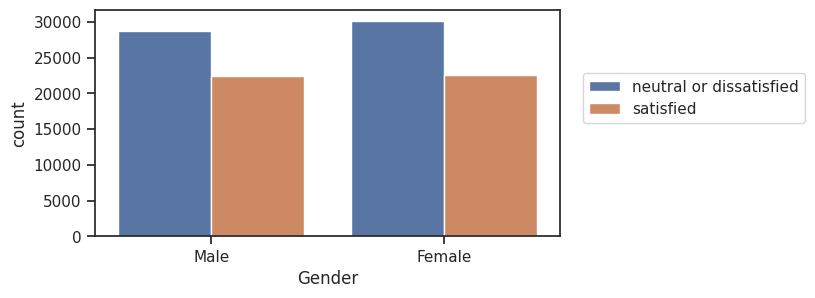

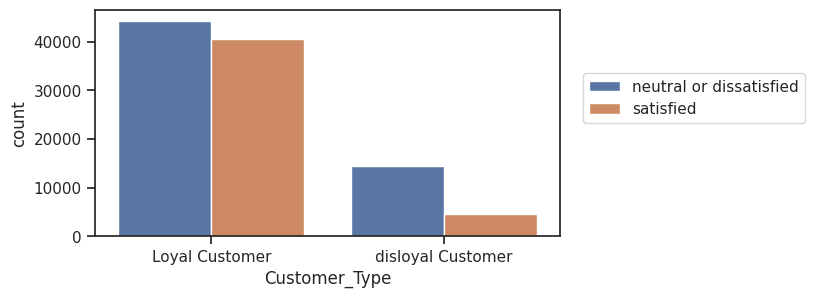

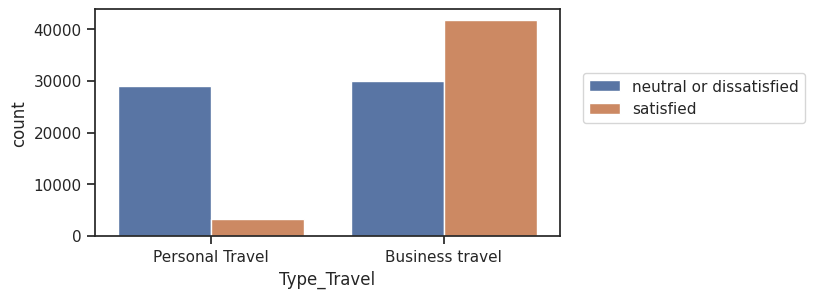

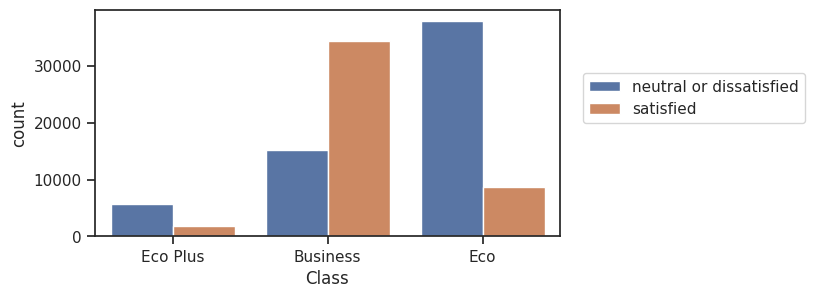

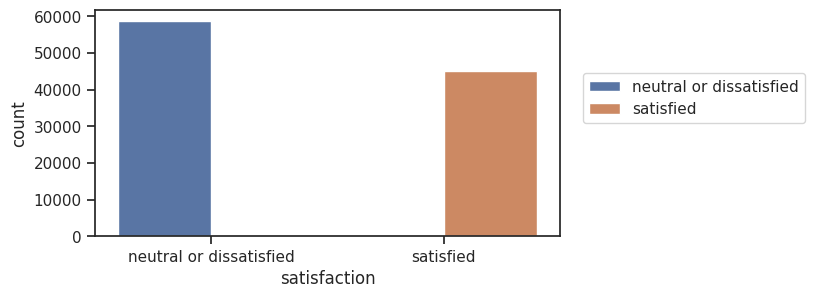

In [ ]:
# Data Visualitation for Satisfied customers 
columns = ['Gender','Customer_Type','Type_Travel','Class','satisfaction']
for col in columns:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=pandasDF,x=col,hue ='satisfaction')
    plt.legend(loc=(1.05,0.5))

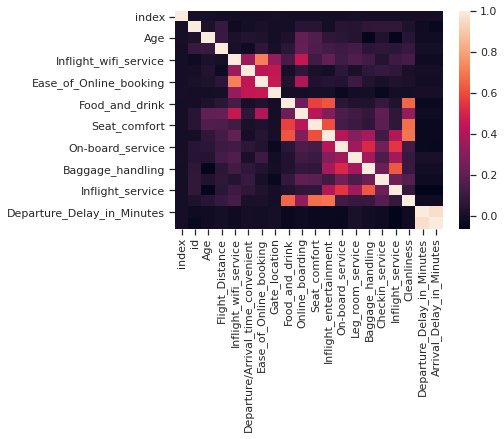

In [ ]:
#Creating a heatmap of the correlation values
sns.heatmap(pandasDF.corr())

In [ ]:
df_analysis.columns

['index',
 'id',
 'Gender',
 'Customer_Type',
 'Age',
 'Type_Travel',
 'Class',
 'Flight_Distance',
 'Inflight_wifi_service',
 'Departure/Arrival_time_convenient',
 'Ease_of_Online_booking',
 'Gate_location',
 'Food_and_drink',
 'Online_boarding',
 'Seat_comfort',
 'Inflight_entertainment',
 'On-board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Inflight_service',
 'Cleanliness',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes',
 'satisfaction']

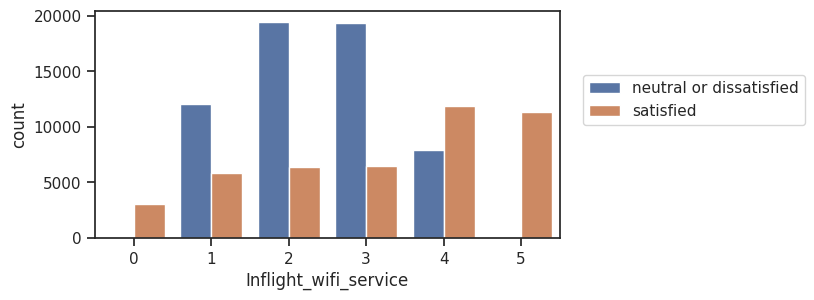

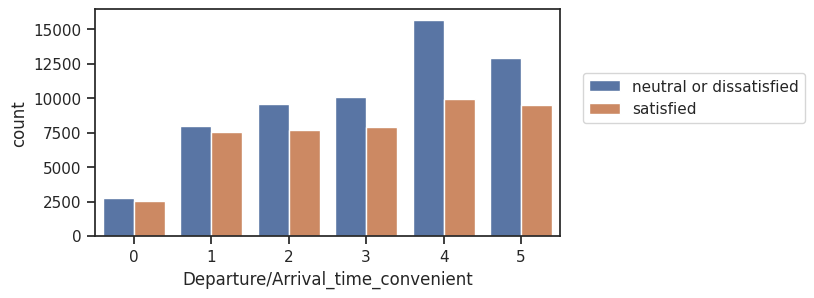

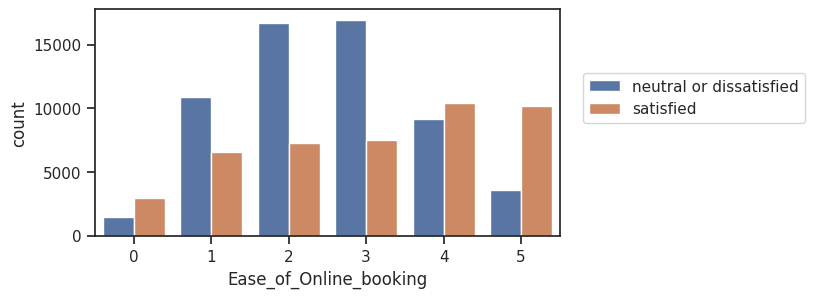

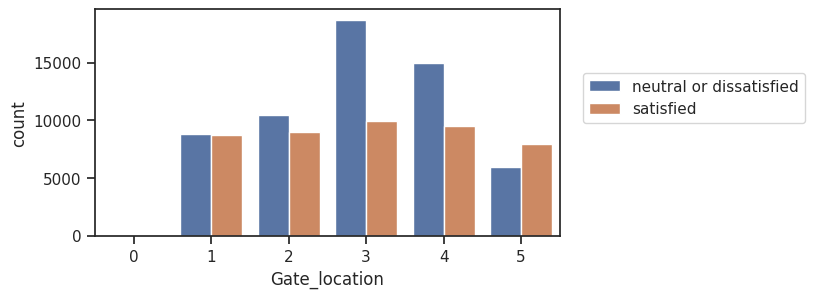

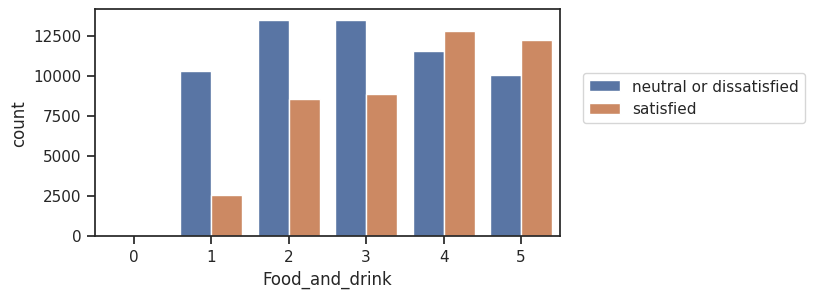

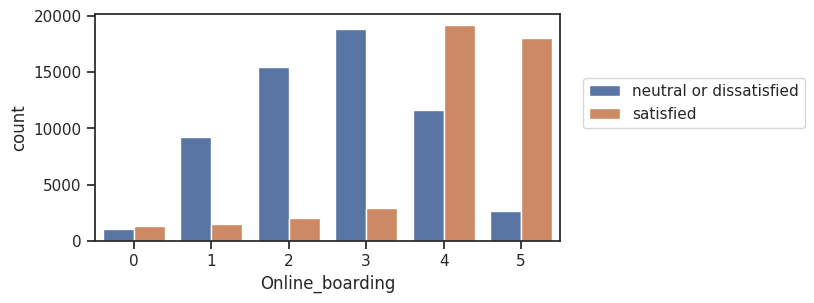

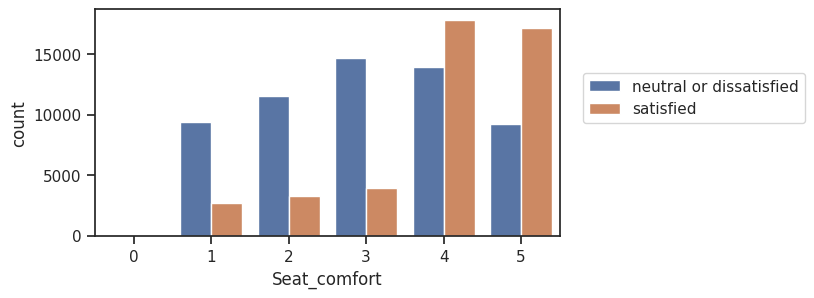

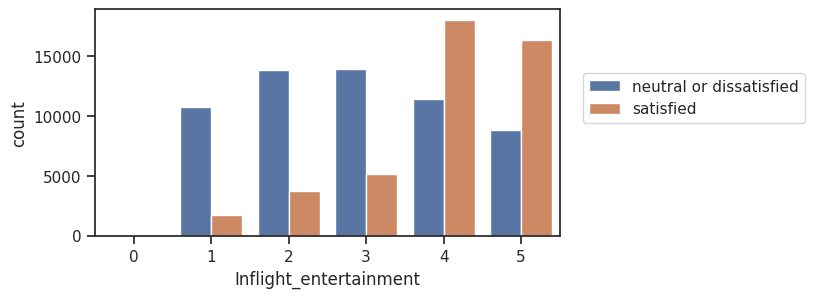

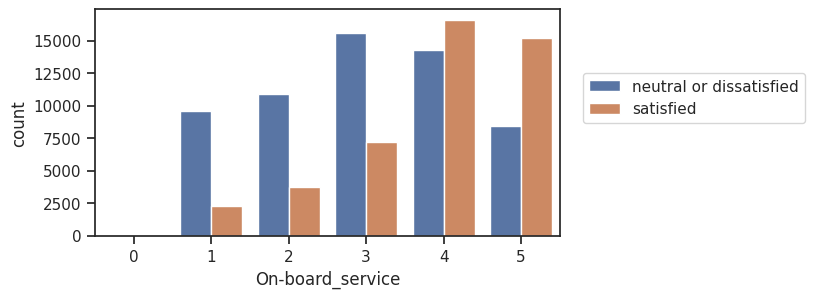

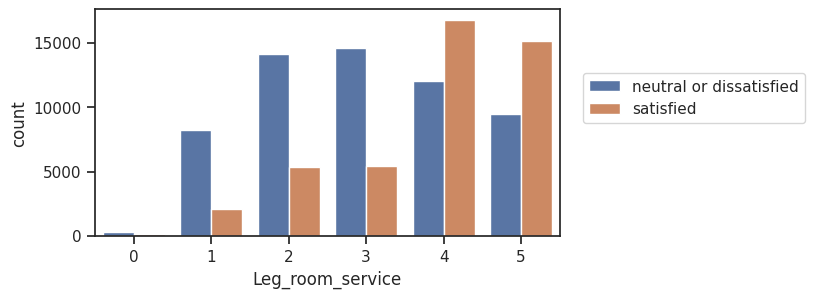

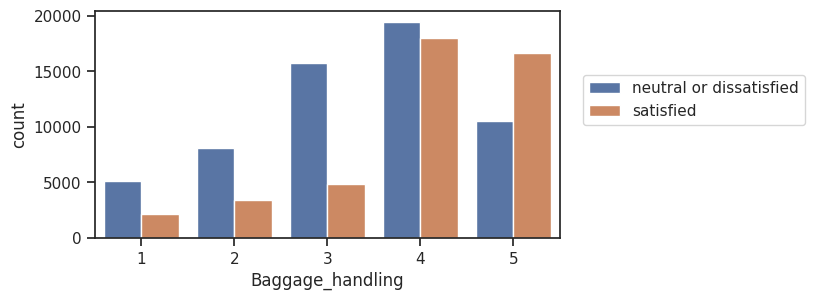

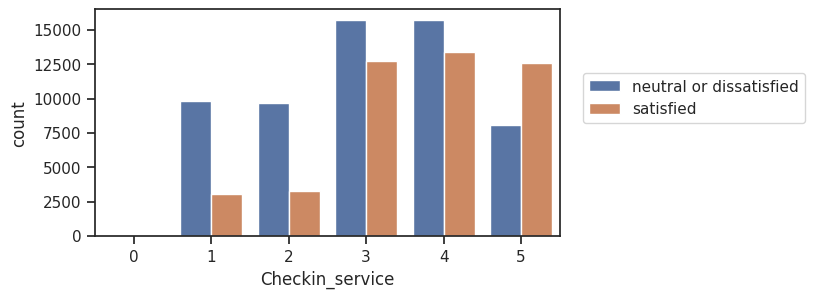

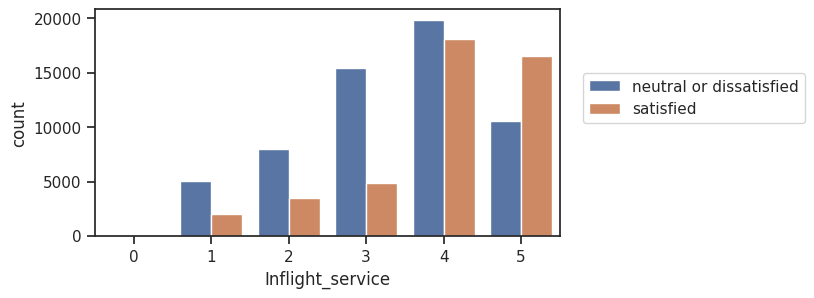

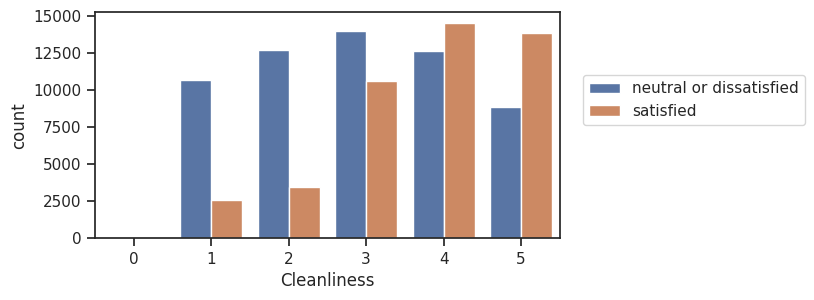

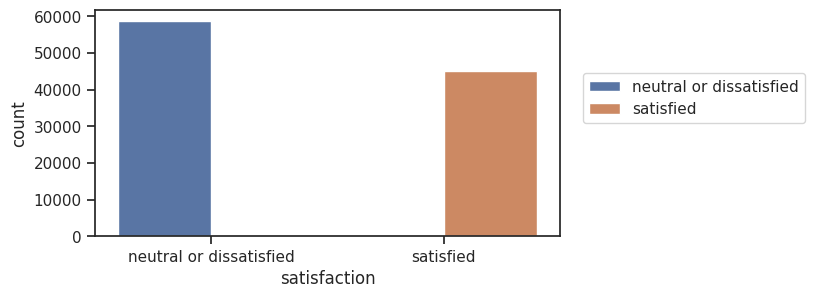

In [ ]:
#Plotting numerical values 

columns_n = [
 'Inflight_wifi_service',
 'Departure/Arrival_time_convenient',
 'Ease_of_Online_booking',
 'Gate_location',
 'Food_and_drink',
 'Online_boarding',
 'Seat_comfort',
 'Inflight_entertainment',
 'On-board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Inflight_service',
 'Cleanliness',
 'satisfaction']
for col in columns_n:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=pandasDF,x=col,hue ='satisfaction')
    plt.legend(loc=(1.05,0.5))

In [ ]:
df_analysis.columns

['index',
 'id',
 'Gender',
 'Customer_Type',
 'Age',
 'Type_Travel',
 'Class',
 'Flight_Distance',
 'Inflight_wifi_service',
 'Departure/Arrival_time_convenient',
 'Ease_of_Online_booking',
 'Gate_location',
 'Food_and_drink',
 'Online_boarding',
 'Seat_comfort',
 'Inflight_entertainment',
 'On-board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Inflight_service',
 'Cleanliness',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes',
 'satisfaction']

ValueError: ignored

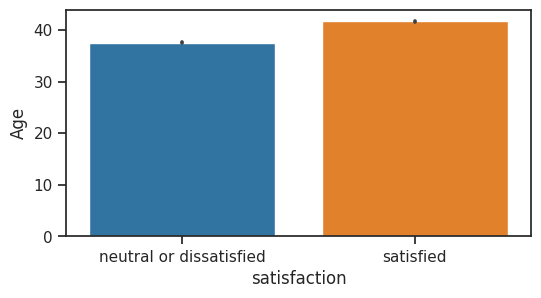

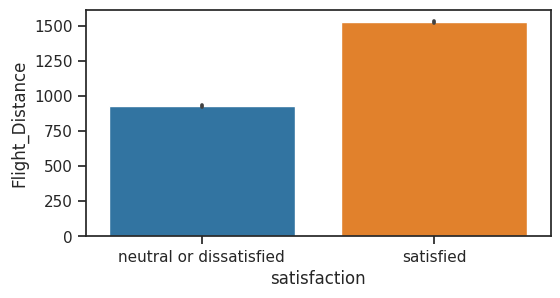

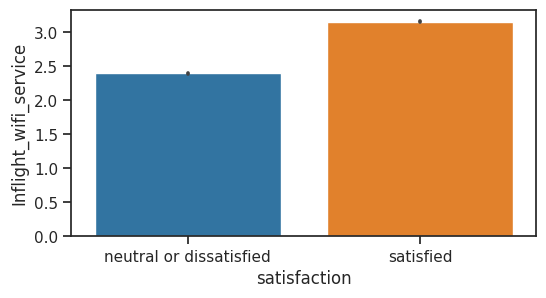

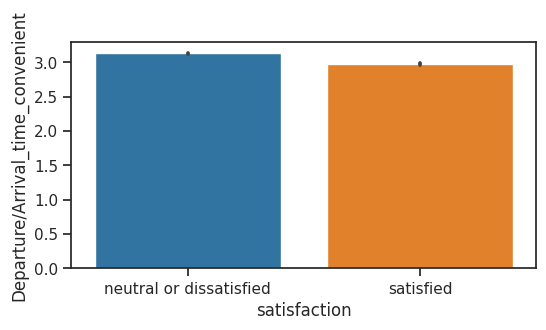

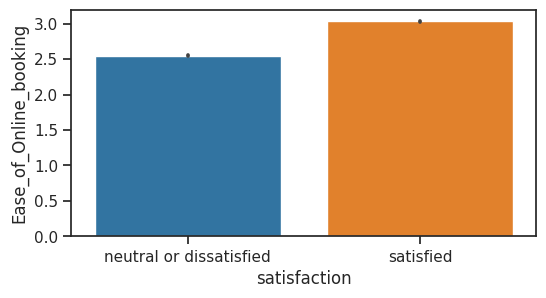

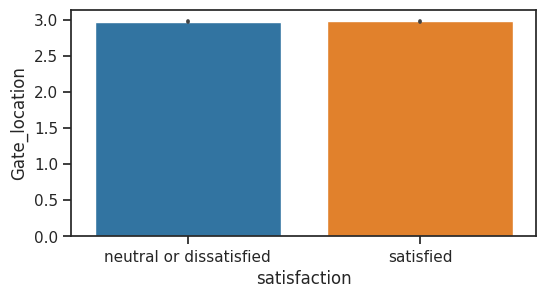

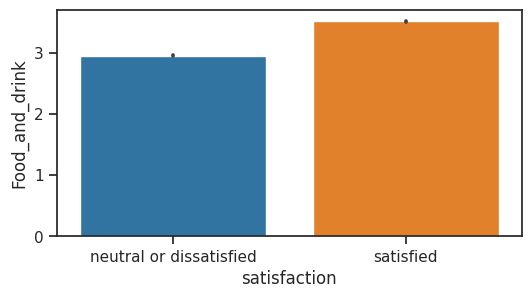

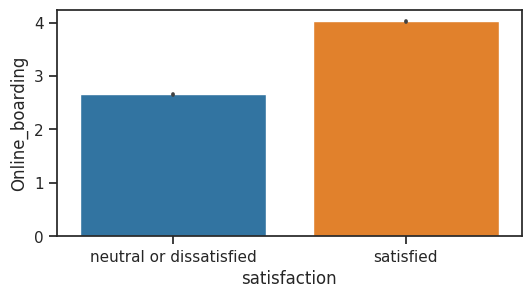

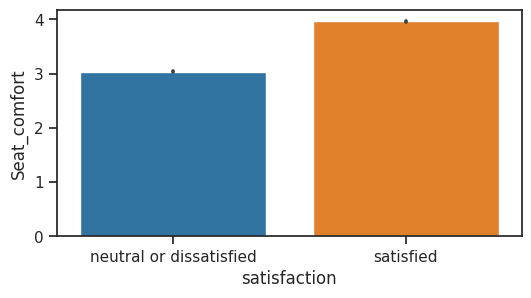

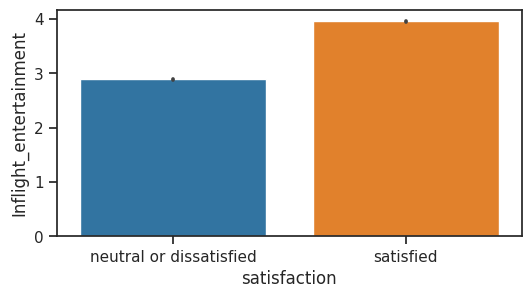

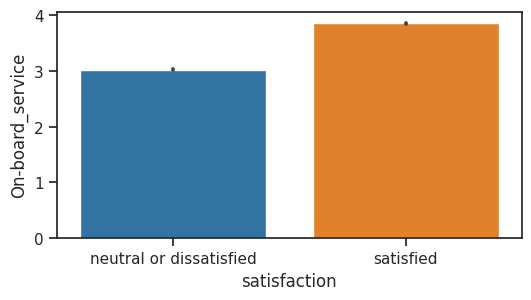

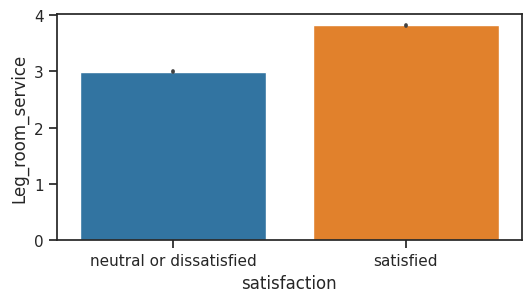

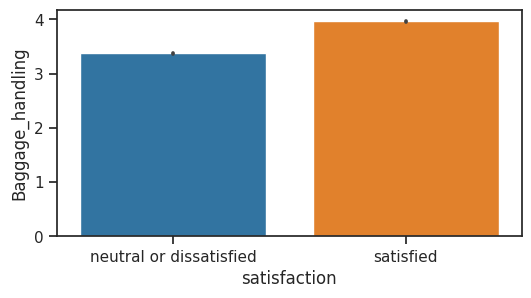

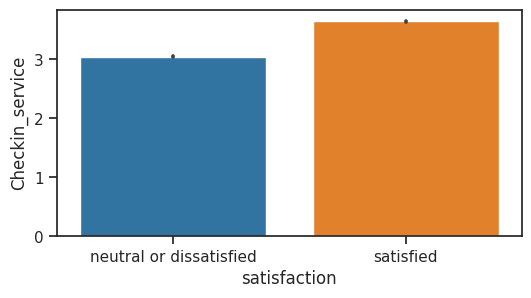

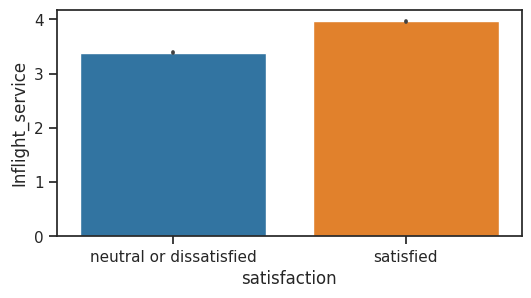

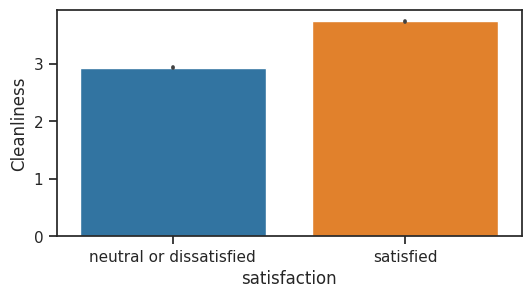

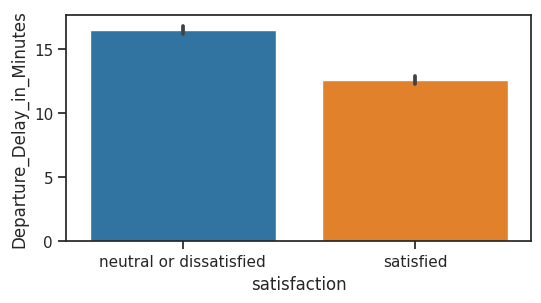

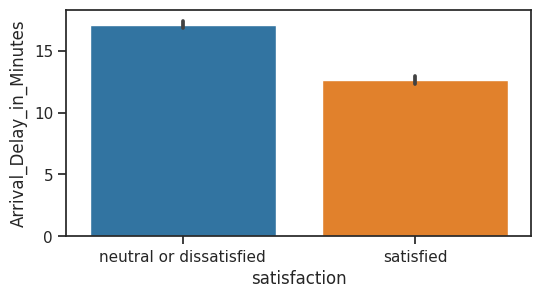

<Figure size 600x300 with 0 Axes>

In [ ]:
columns_n2 = [ 
 'Age',
 'Flight_Distance',
 'Inflight_wifi_service',
 'Departure/Arrival_time_convenient',
 'Ease_of_Online_booking',
 'Gate_location',
 'Food_and_drink',
 'Online_boarding',
 'Seat_comfort',
 'Inflight_entertainment',
 'On-board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Inflight_service',
 'Cleanliness',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes',
 'satisfaction']

for col in columns_n2:
    plt.figure(figsize=(6,3), dpi=100)
    sns.barplot(data=pandasDF,x='satisfaction',y=col,palette="tab10")

In [ ]:
#Categorizing the string Columns 
# [Row(Gender='Female' for 0 ), Row(Gender='Male') for 0]
#[Row(Customer Type='Loyal Customer' for 0), Row(Customer Type='disloyal Customer')for 1]
#[Row(Type_Travel='Personal Travel' ==0), Row(Type_Travel='Business travel'==1)]
#[Row(Class='Eco Plus') for 0, Row(Class='Business') for 1 , Row(Class='Eco'). for 2]
#[Row(satisfaction='neutral or dissatisfied') for 0, Row(satisfaction='satisfied') for 1]
df.groupby('Class').mean().show()

+-----+-----------------+-----------------+-------------------+-------------------+------------------+------------------+----------+--------------------+--------------------------+--------------------------------------+---------------------------+------------------+-------------------+--------------------+------------------+---------------------------+---------------------+---------------------+---------------------+--------------------+---------------------+------------------+-------------------------------+-----------------------------+
|Class|       avg(index)|          avg(id)|        avg(Gender)| avg(Customer_Type)|          avg(Age)|  avg(Type_Travel)|avg(Class)|avg(Flight_Distance)|avg(Inflight_wifi_service)|avg(Departure/Arrival_time_convenient)|avg(Ease_of_Online_booking)|avg(Gate_location)|avg(Food_and_drink)|avg(Online_boarding)| avg(Seat_comfort)|avg(Inflight_entertainment)|avg(On-board_service)|avg(Leg_room_service)|avg(Baggage_handling)|avg(Checkin_service)|avg(Inflight_s

In [ ]:
df.groupBy("satisfaction").mean().show()

+--------------------+-----------------+-----------------+------------------+-------------------+------------------+------------------+------------------+--------------------+--------------------------+--------------------------------------+---------------------------+------------------+-------------------+--------------------+-----------------+---------------------------+---------------------+---------------------+---------------------+--------------------+---------------------+------------------+-------------------------------+-----------------------------+
|        satisfaction|       avg(index)|          avg(id)|       avg(Gender)| avg(Customer_Type)|          avg(Age)|  avg(Type_Travel)|        avg(Class)|avg(Flight_Distance)|avg(Inflight_wifi_service)|avg(Departure/Arrival_time_convenient)|avg(Ease_of_Online_booking)|avg(Gate_location)|avg(Food_and_drink)|avg(Online_boarding)|avg(Seat_comfort)|avg(Inflight_entertainment)|avg(On-board_service)|avg(Leg_room_service)|avg(Baggage_han

In [ ]:
df.groupBy("Class","satisfaction") \
    .mean() \
    .show()

+-----+--------------------+------------------+------------------+-------------------+--------------------+------------------+------------------+----------+--------------------+--------------------------+--------------------------------------+---------------------------+------------------+-------------------+--------------------+------------------+---------------------------+---------------------+---------------------+---------------------+--------------------+---------------------+------------------+-------------------------------+-----------------------------+
|Class|        satisfaction|        avg(index)|           avg(id)|        avg(Gender)|  avg(Customer_Type)|          avg(Age)|  avg(Type_Travel)|avg(Class)|avg(Flight_Distance)|avg(Inflight_wifi_service)|avg(Departure/Arrival_time_convenient)|avg(Ease_of_Online_booking)|avg(Gate_location)|avg(Food_and_drink)|avg(Online_boarding)| avg(Seat_comfort)|avg(Inflight_entertainment)|avg(On-board_service)|avg(Leg_room_service)|avg(Bagga

In [ ]:
dff = df.groupBy("satisfaction").mean()
dff.write.format("csv").save("/content/excel.csv")

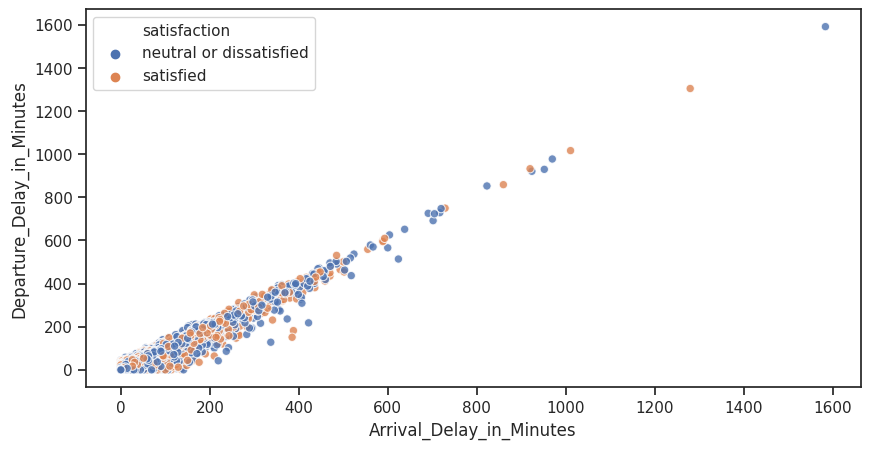

In [ ]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=pandasDF,x='Arrival_Delay_in_Minutes',y='Departure_Delay_in_Minutes',hue='satisfaction', alpha=0.8)

(0.0, 1000.0)

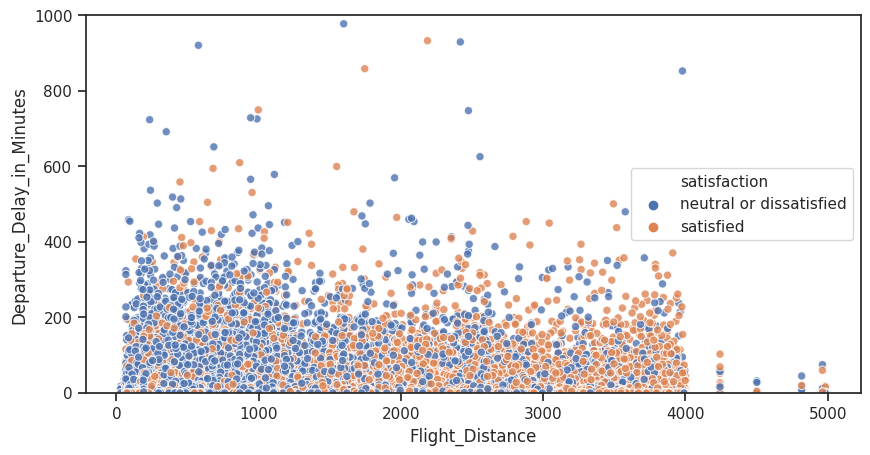

In [ ]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=pandasDF,x='Flight_Distance',y='Departure_Delay_in_Minutes',hue='satisfaction', alpha=0.8)
plt.ylim(0,1000)

In [ ]:
sudo pip install xgboost

SyntaxError: ignored

In [ ]:
pip install -U scikit-learn

NameError: ignored

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
f = ['index',
 'id',
 'Gender',
 'Customer_Type',
 'Age',
 'Type_Travel',
 'Class',
 'Flight_Distance',
 'Inflight_wifi_service',
 'Departure/Arrival_time_convenient',
 'Ease_of_Online_booking',
 'Gate_location',
 'Food_and_drink',
 'Online_boarding',
 'Seat_comfort',
 'Inflight_entertainment',
 'On-board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Inflight_service',
 'Cleanliness',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes']


vector_assembler = VectorAssembler(\
inputCols=('index',
 'id',
 'Gender',
 'Customer_Type',
 'Age',
 'Type_Travel',
 'Class',
 'Flight_Distance',
 'Inflight_wifi_service',
 'Departure/Arrival_time_convenient',
 'Ease_of_Online_booking',
 'Gate_location',
 'Food_and_drink',
 'Online_boarding',
 'Seat_comfort',
 'Inflight_entertainment',
 'On-board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Inflight_service',
 'Cleanliness',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes'),\
outputCol= "features")
df_temp = vector_assembler.transform(df)
data_training_and_test = df_temp
df_temp.show(3)

+-----+------+------+-------------+---+-----------+-----+---------------+---------------------+---------------------------------+----------------------+-------------+--------------+---------------+------------+----------------------+----------------+----------------+----------------+---------------+----------------+-----------+--------------------------+------------------------+--------------------+--------------------+
|index|    id|Gender|Customer_Type|Age|Type_Travel|Class|Flight_Distance|Inflight_wifi_service|Departure/Arrival_time_convenient|Ease_of_Online_booking|Gate_location|Food_and_drink|Online_boarding|Seat_comfort|Inflight_entertainment|On-board_service|Leg_room_service|Baggage_handling|Checkin_service|Inflight_service|Cleanliness|Departure_Delay_in_Minutes|Arrival_Delay_in_Minutes|        satisfaction|            features|
+-----+------+------+-------------+---+-----------+-----+---------------+---------------------+---------------------------------+----------------------+

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator


In [ ]:
df_f = df_temp.drop('index',
 'id',
 'Gender',
 'Customer_Type',
 'Age',
 'Type_Travel',
 'Class',
 'Flight_Distance',
 'Inflight_wifi_service',
 'Departure/Arrival_time_convenient',
 'Ease_of_Online_booking',
 'Gate_location',
 'Food_and_drink',
 'Online_boarding',
 'Seat_comfort',
 'Inflight_entertainment',
 'On-board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Inflight_service',
 'Cleanliness',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes')
df_f.show()

+--------------------+--------------------+
|        satisfaction|            features|
+--------------------+--------------------+
|neutral or dissat...|[0.0,70172.0,1.0,...|
|neutral or dissat...|[1.0,5047.0,1.0,1...|
|           satisfied|[2.0,110028.0,0.0...|
|neutral or dissat...|[3.0,24026.0,0.0,...|
|           satisfied|[4.0,119299.0,1.0...|
|neutral or dissat...|[5.0,111157.0,0.0...|
|neutral or dissat...|[6.0,82113.0,1.0,...|
|           satisfied|[7.0,96462.0,0.0,...|
|neutral or dissat...|[8.0,79485.0,0.0,...|
|neutral or dissat...|[9.0,65725.0,1.0,...|
|neutral or dissat...|[10.0,34991.0,0.0...|
|neutral or dissat...|[11.0,51412.0,0.0...|
|neutral or dissat...|[12.0,98628.0,1.0...|
|           satisfied|[13.0,83502.0,1.0...|
|neutral or dissat...|[14.0,95789.0,0.0...|
|neutral or dissat...|[15.0,100580.0,1....|
|           satisfied|[16.0,71142.0,0.0...|
|           satisfied|[17.0,127461.0,1....|
|           satisfied|[18.0,70354.0,0.0...|
|neutral or dissat...|[19.0,6624

In [ ]:

df_without_na = df_f.na.drop(subset='features')
df_f = df_without_na.na.drop(subset='satisfaction')
df_without_na.show()

+--------------------+--------------------+
|        satisfaction|            features|
+--------------------+--------------------+
|neutral or dissat...|[0.0,70172.0,1.0,...|
|neutral or dissat...|[1.0,5047.0,1.0,1...|
|           satisfied|[2.0,110028.0,0.0...|
|neutral or dissat...|[3.0,24026.0,0.0,...|
|           satisfied|[4.0,119299.0,1.0...|
|neutral or dissat...|[5.0,111157.0,0.0...|
|neutral or dissat...|[6.0,82113.0,1.0,...|
|           satisfied|[7.0,96462.0,0.0,...|
|neutral or dissat...|[8.0,79485.0,0.0,...|
|neutral or dissat...|[9.0,65725.0,1.0,...|
|neutral or dissat...|[10.0,34991.0,0.0...|
|neutral or dissat...|[11.0,51412.0,0.0...|
|neutral or dissat...|[12.0,98628.0,1.0...|
|           satisfied|[13.0,83502.0,1.0...|
|neutral or dissat...|[14.0,95789.0,0.0...|
|neutral or dissat...|[15.0,100580.0,1....|
|           satisfied|[16.0,71142.0,0.0...|
|           satisfied|[17.0,127461.0,1....|
|           satisfied|[18.0,70354.0,0.0...|
|neutral or dissat...|[19.0,6624

In [ ]:
from pyspark.ml.feature import StringIndexer
l_indexer = StringIndexer(inputCol ="satisfaction", outputCol= "SatisIndex")
df_f1 = l_indexer.fit(df_f).transform(df_f)
df_f1.show(3)

+--------------------+--------------------+----------+
|        satisfaction|            features|SatisIndex|
+--------------------+--------------------+----------+
|neutral or dissat...|[0.0,70172.0,1.0,...|       0.0|
|neutral or dissat...|[1.0,5047.0,1.0,1...|       0.0|
|           satisfied|[2.0,110028.0,0.0...|       1.0|
+--------------------+--------------------+----------+
only showing top 3 rows



In [ ]:
(trainingData, testData) = df_f1.randomSplit([0.7,0.3])

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
dt = DecisionTreeClassifier(labelCol= "SatisIndex", featuresCol= "features")
model = dt.fit(trainingData)

In [ ]:
predictions = model.transform(testData)
predictions.select("prediction","SatisIndex").show(15)

+----------+----------+
|prediction|SatisIndex|
+----------+----------+
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       1.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
+----------+----------+
only showing top 15 rows



In [ ]:
evaluator = MulticlassClassificationEvaluator(\
labelCol="SatisIndex", predictionCol= "prediction",\
metricName = "accuracy")
accurancy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accurancy))
print("Test set accurancy = " + str(accurancy))

Test Error = 0.0930644
Test set accurancy = 0.9069355980184005


In [ ]:
from pyspark.ml.classification import NaiveBayes
nb = NaiveBayes(labelCol= "SatisIndex", 
featuresCol="features", smoothing = 1.0,\
modelType="multinomial")
model = nb.fit(trainingData)

Py4JJavaError: ignored